In [1]:
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Activation, Input, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import os
import random
import matplotlib.pyplot as plt
from openpyxl import Workbook

In [2]:
def build_model(input_shape, output_dim):
    model = Sequential()
    model.add(Conv2D(64, input_shape = input_shape, activation='relu', kernel_size=(3, 3)))
    model.add(Flatten())
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(output_dim, activation = 'softmax'))
    model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
    model.summary()
    
    return model

In [3]:
def one_hot_encoding(labels):
    labels_copy = np.copy(labels)
    dic = {}
    keys = np.unique(labels_copy)

    for i in range(len(keys)):
        dic[keys[i]] = i
    
    for i in range(len(labels_copy)):
        labels_copy[i] = dic[labels_copy[i]]
        
    return to_categorical(labels_copy)

In [4]:
def back_to_normal_labels(y_pred, ctc):
    return [str(ctc[list(i).index(max(i))]) for i in y_pred]

In [5]:
a = [[0.1676367, 0.7563834], 
     [0.9676367, 0.1563834], 
     [0.8676367, 0.2563834], 
     [0.1676367, 0.9563834]]

ctc = [1, 5]
back_to_normal_labels(a, ctc)

['5', '1', '1', '5']

In [6]:
def SPEC(y_test, y_pred):
    classes = np.unique(y_test)
    specs = []
    
    for i in classes:
        fp = 0
        tn = 0
        
        for test, pred in zip(y_test, y_pred):
            if pred == i and test != i:
                fp += 1
            if test != i and pred != i:
                tn += 1
        
        try:            
            spec = tn / (tn + fp)
        except:
            spec = 1
            
        specs.append(spec)    
    
    return round(np.mean(specs)*100, 2)

In [7]:
def FPR(y_test, y_pred):
    classes = np.unique(y_test)
    fprs = []
    
    for i in classes:
        fp = 0
        tn = 0
        
        for test, pred in zip(y_test, y_pred):
            if pred == i and test != i:
                fp += 1
            if test != i and pred != i:
                tn += 1
                
        try:            
            fpr = fp / (fp + tn)
        except:
            fpr = 0
            
        fprs.append(fpr)
            
    
    return round(np.mean(fprs), 3)

In [8]:
def FPR_h(y_test, y_pred):
    classes = np.unique(y_test)
    fprs = []
    
    for i in classes:
        fp = 0
        tn = 0
        
        for test, pred in zip(y_test, y_pred):
            if pred == i and test != i:
                fp += 1
            if test != i and pred != i:
                tn += 1
                
        try:            
            fpr = fp / (fp + tn)
        except:
            fpr = 0
            
        fprs.append(fpr)
            
    
    return round(np.mean(fprs) * (720/len(y_test)), 3)

In [9]:
pts = ["01", "04", "05", "06", "07", "08", "09", "10", "15", "16", "18", "21", "22"]

In [10]:
number_of_channels = 17
number_of_clusters = [2, 3, 4, 5, 6, 7, 10, 15, 30, 50]

In [11]:
length = 60

In [14]:
classes_to_classify = [['1', '5'],
                       ['1', '2', '3', '4', '5']]

Cluster 50:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 98, 64)        640       
_________________________________________________________________
flatten (Flatten)            (None, 94080)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                3010592   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.0684 - accuracy: 0.9896


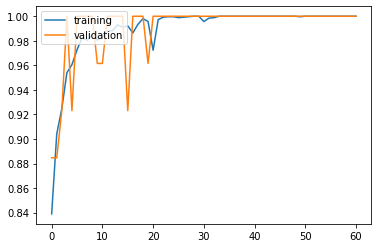

Prec: 0.989558717144924, Recall: 0.9896295581709434, Spec: 98.96, FPR: 0.01, FPR_h: 0.026
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_1 (Flatten)          (None, 94080)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                3010592   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 9ms/step - loss: 0.0546 - accuracy: 0.9826


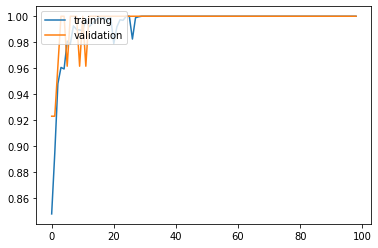

Prec: 0.9827037197857866, Recall: 0.9825873046498167, Spec: 98.26, FPR: 0.017, FPR_h: 0.044
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_2 (Flatten)          (None, 94080)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                3010592   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.0595 - accuracy: 0.9792


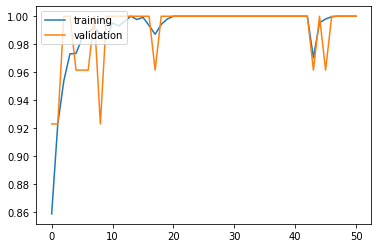

Prec: 0.9795366795366796, Recall: 0.9791666666666667, Spec: 97.92, FPR: 0.021, FPR_h: 0.052
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_3 (Flatten)          (None, 94080)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                3010592   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.1722 - accuracy: 0.9722


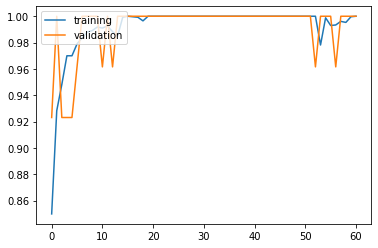

Prec: 0.9717058567910772, Recall: 0.9729847494553376, Spec: 97.3, FPR: 0.027, FPR_h: 0.068
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_4 (Flatten)          (None, 94080)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                3010592   
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.0436 - accuracy: 0.9931


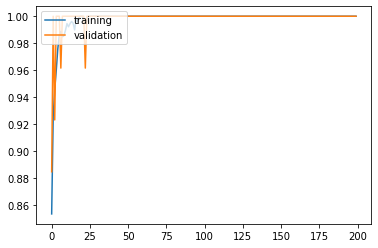

Prec: 0.9928571428571429, Recall: 0.9933333333333334, Spec: 99.33, FPR: 0.007, FPR_h: 0.017
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_5 (Flatten)          (None, 94080)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 10ms/step - loss: 0.0252 - accuracy: 0.9931


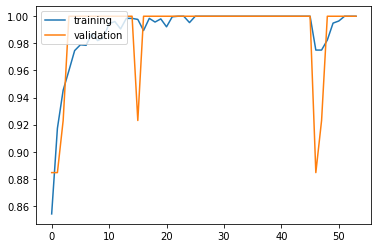

Prec: 0.9930555555555556, Recall: 0.9931506849315068, Spec: 99.32, FPR: 0.007, FPR_h: 0.017
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_6 (Flatten)          (None, 94080)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 7ms/step - loss: 0.1291 - accuracy: 0.9861


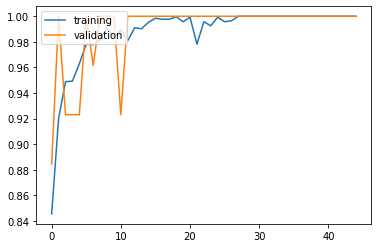

Prec: 0.9859154929577465, Recall: 0.9866666666666667, Spec: 98.67, FPR: 0.013, FPR_h: 0.033
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_7 (Flatten)          (None, 94080)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 9ms/step - loss: 0.0212 - accuracy: 0.9931


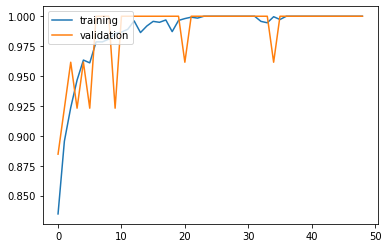

Prec: 0.993050193050193, Recall: 0.993050193050193, Spec: 99.31, FPR: 0.007, FPR_h: 0.017
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_8 (Flatten)          (None, 94080)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.9930


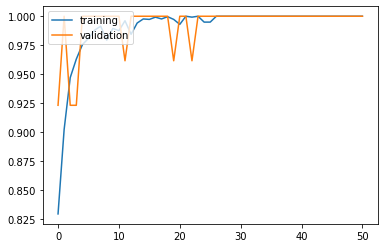

Prec: 0.9930555555555556, Recall: 0.993103448275862, Spec: 99.31, FPR: 0.007, FPR_h: 0.017
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_9 (Flatten)          (None, 94080)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.0666 - accuracy: 0.9895


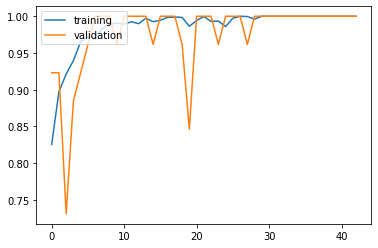

Prec: 0.9903225806451612, Recall: 0.9888888888888889, Spec: 98.89, FPR: 0.011, FPR_h: 0.028
Pt-01:
accuracy: 98.72
precision: 98.72
recall: 98.73
SPEC: 98.73
FPR: 0.013
FPR_h: 0.032

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_10 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 9ms/step - loss:

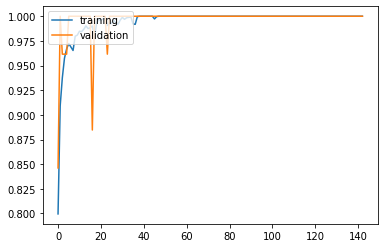

Prec: 0.9584599797365754, Recall: 0.9582830962141307, Spec: 95.83, FPR: 0.042, FPR_h: 0.104
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_11 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.2620 - accuracy: 0.9583


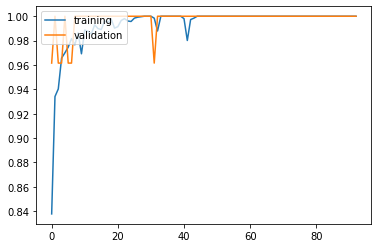

Prec: 0.9576468307811592, Recall: 0.9586247086247086, Spec: 95.86, FPR: 0.041, FPR_h: 0.103
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_12 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.1843 - accuracy: 0.9688


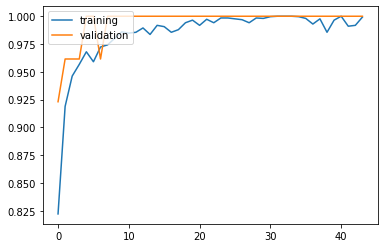

Prec: 0.9688092575485, Recall: 0.9682400932400932, Spec: 96.82, FPR: 0.032, FPR_h: 0.079
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_13 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 9ms/step - loss: 0.0925 - accuracy: 0.9722


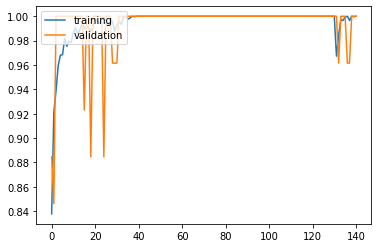

Prec: 0.9721886919994206, Recall: 0.9721886919994206, Spec: 97.22, FPR: 0.028, FPR_h: 0.07
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_14 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.2123 - accuracy: 0.9549


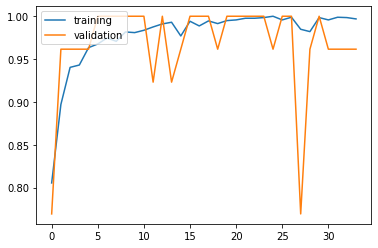

Prec: 0.9533668730650156, Recall: 0.9569255521427527, Spec: 95.69, FPR: 0.043, FPR_h: 0.108
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_15 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.1006 - accuracy: 0.9826


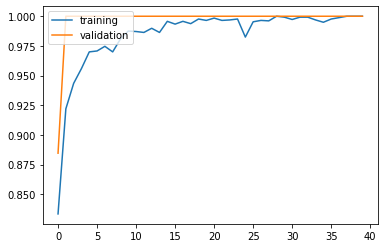

Prec: 0.9825589810392241, Recall: 0.9827220077220078, Spec: 98.27, FPR: 0.017, FPR_h: 0.043
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_16 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.1423 - accuracy: 0.9722


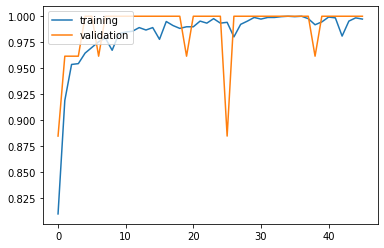

Prec: 0.9721362229102167, Recall: 0.9721362229102167, Spec: 97.21, FPR: 0.028, FPR_h: 0.07
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_17 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.1220 - accuracy: 0.9722


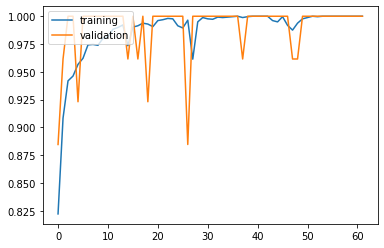

Prec: 0.9725927722532137, Recall: 0.971677559912854, Spec: 97.17, FPR: 0.028, FPR_h: 0.071
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_18 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.0782 - accuracy: 0.9721


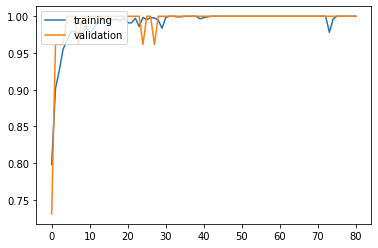

Prec: 0.9718792533540734, Recall: 0.9723844282238443, Spec: 97.24, FPR: 0.028, FPR_h: 0.069
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_19 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.2263 - accuracy: 0.9826


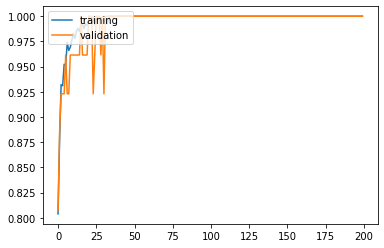

Prec: 0.984375, Recall: 0.9810606060606061, Spec: 98.11, FPR: 0.019, FPR_h: 0.048
Pt-04:
accuracy: 96.94
precision: 96.94
recall: 96.94
SPEC: 96.94
FPR: 0.031
FPR_h: 0.077

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_20 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_41 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.4030 - 

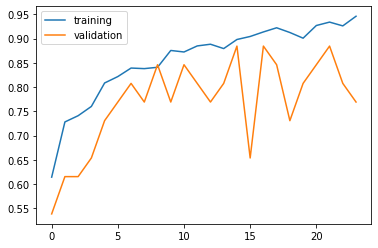

Prec: 0.8606140120703227, Recall: 0.8326797385620915, Spec: 83.27, FPR: 0.167, FPR_h: 0.418
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_21 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_42 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.3512 - accuracy: 0.8507


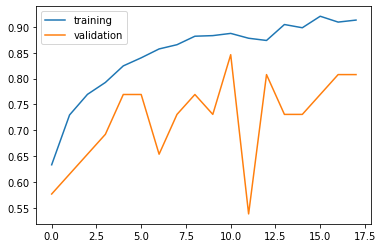

Prec: 0.8520834339240018, Recall: 0.8527476780185759, Spec: 85.27, FPR: 0.147, FPR_h: 0.368
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_22 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_45 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.4266 - accuracy: 0.8576


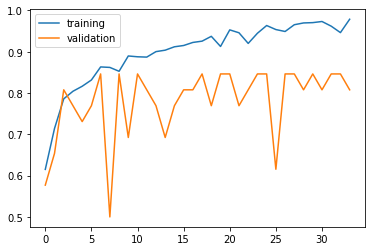

Prec: 0.8588073527283253, Recall: 0.8620740019474197, Spec: 86.21, FPR: 0.138, FPR_h: 0.345
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_23 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.4095 - accuracy: 0.8542


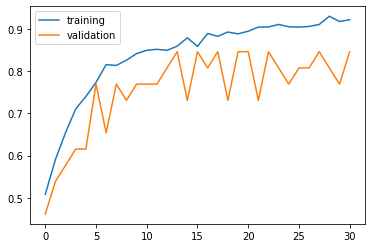

Prec: 0.8596491228070176, Recall: 0.8490419597380547, Spec: 84.9, FPR: 0.151, FPR_h: 0.377
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_24 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_48 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_49 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.5509 - accuracy: 0.8368


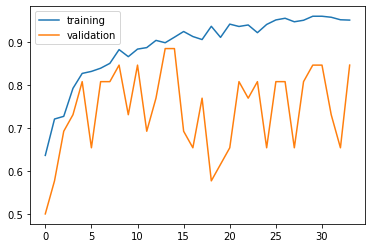

Prec: 0.8355730652100353, Recall: 0.8371212121212122, Spec: 83.71, FPR: 0.163, FPR_h: 0.407
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_25 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_50 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.4035 - accuracy: 0.8507


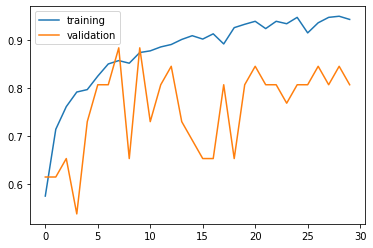

Prec: 0.8521515797635201, Recall: 0.8504702194357368, Spec: 85.05, FPR: 0.15, FPR_h: 0.374
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_26 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_52 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.3863 - accuracy: 0.8542


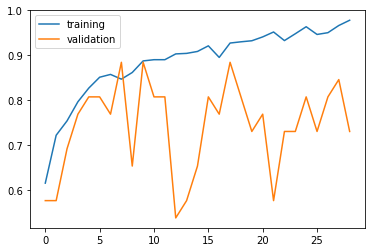

Prec: 0.8760278304870335, Recall: 0.8457065322736965, Spec: 84.57, FPR: 0.154, FPR_h: 0.386
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_27 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_54 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_55 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.3799 - accuracy: 0.8333


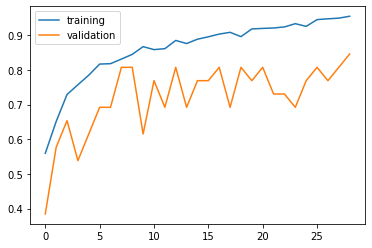

Prec: 0.8376289920281703, Recall: 0.8329394743187847, Spec: 83.29, FPR: 0.167, FPR_h: 0.418
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_28 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_56 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.3411 - accuracy: 0.8432


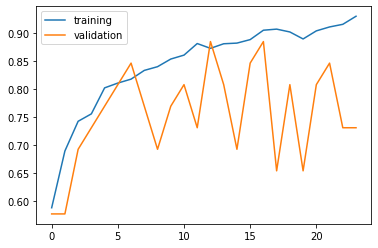

Prec: 0.8493514150943396, Recall: 0.8457834840968776, Spec: 84.58, FPR: 0.154, FPR_h: 0.387
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_29 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_58 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.3722 - accuracy: 0.8571


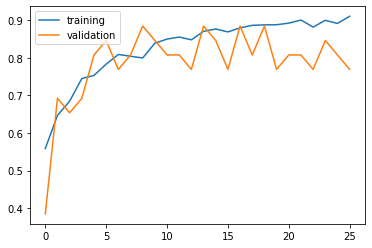

Prec: 0.8574477480129525, Recall: 0.8553555750658473, Spec: 85.54, FPR: 0.145, FPR_h: 0.363
Pt-05:
accuracy: 84.78
precision: 85.39
recall: 84.64
SPEC: 84.64
FPR: 0.154
FPR_h: 0.384

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_30 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_60 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_61 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 8ms/step - los

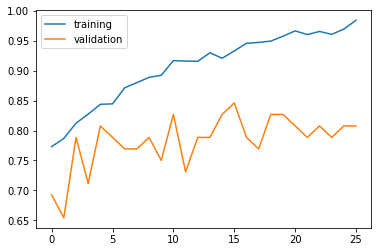

Prec: 0.8940314704286489, Recall: 0.894159791576205, Spec: 89.42, FPR: 0.106, FPR_h: 0.132
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_31 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_62 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 8ms/step - loss: 0.2692 - accuracy: 0.8802


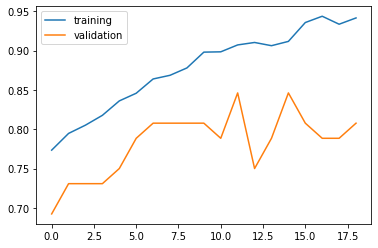

Prec: 0.8814518854714886, Recall: 0.8817698580489278, Spec: 88.18, FPR: 0.118, FPR_h: 0.148
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_32 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_64 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_65 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 8ms/step - loss: 0.4410 - accuracy: 0.8559


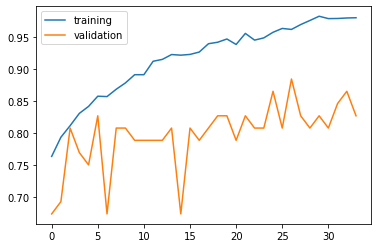

Prec: 0.8565682007140412, Recall: 0.853478055343442, Spec: 85.35, FPR: 0.147, FPR_h: 0.183
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_33 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_66 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_67 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 8ms/step - loss: 0.2967 - accuracy: 0.8819


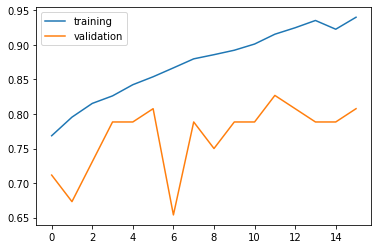

Prec: 0.8858596383695985, Recall: 0.880045398017459, Spec: 88.0, FPR: 0.12, FPR_h: 0.15
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_34 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_68 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_69 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 8ms/step - loss: 0.3706 - accuracy: 0.8576


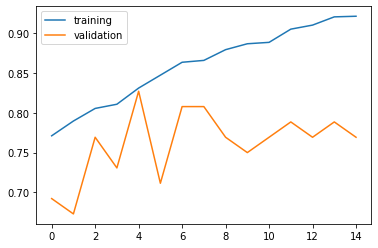

Prec: 0.8679646017699114, Recall: 0.8522875816993465, Spec: 85.23, FPR: 0.148, FPR_h: 0.185
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_35 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_70 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_71 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 8ms/step - loss: 0.3845 - accuracy: 0.8385


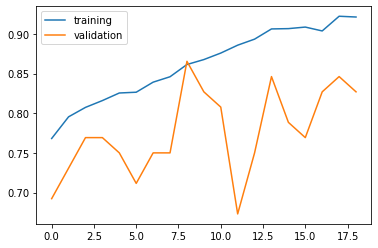

Prec: 0.8385416666666667, Recall: 0.8397253644667595, Spec: 83.97, FPR: 0.16, FPR_h: 0.2
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_36 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_72 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_73 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 8ms/step - loss: 0.3485 - accuracy: 0.8452


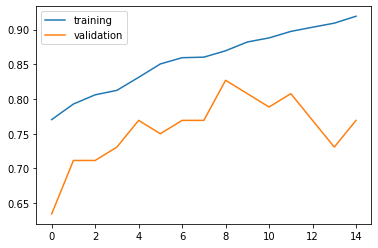

Prec: 0.8499865403910629, Recall: 0.846132436226342, Spec: 84.61, FPR: 0.154, FPR_h: 0.193
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_37 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_74 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_75 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 8ms/step - loss: 0.3074 - accuracy: 0.8817


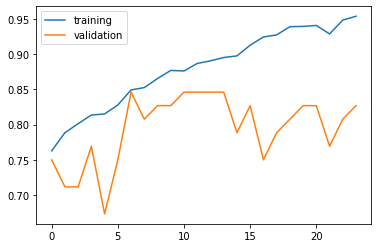

Prec: 0.882342533616419, Recall: 0.8803469120217517, Spec: 88.03, FPR: 0.12, FPR_h: 0.15
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_38 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_76 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_77 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 8ms/step - loss: 0.6104 - accuracy: 0.8348


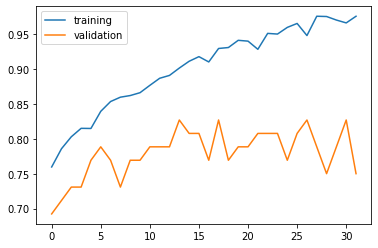

Prec: 0.8431379840349051, Recall: 0.8349182152535811, Spec: 83.49, FPR: 0.165, FPR_h: 0.207
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_39 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_78 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_79 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 8ms/step - loss: 0.4544 - accuracy: 0.8713


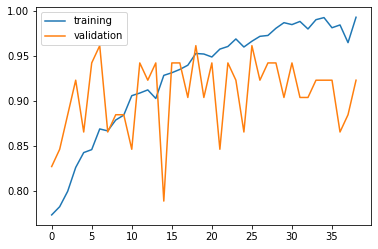

Prec: 0.8712596612797713, Recall: 0.8710888307662501, Spec: 87.11, FPR: 0.129, FPR_h: 0.161
Pt-06:
accuracy: 86.41
precision: 86.71
recall: 86.34
SPEC: 86.34
FPR: 0.137
FPR_h: 0.171

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_40 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_80 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_81 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss:

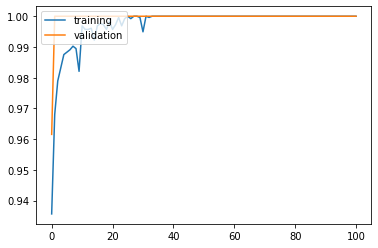

Prec: 0.9966216216216216, Recall: 0.9964539007092199, Spec: 99.65, FPR: 0.004, FPR_h: 0.009
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_41 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_82 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_83 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 9ms/step - loss: 0.0625 - accuracy: 0.9965


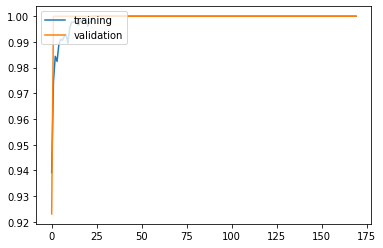

Prec: 0.9964028776978417, Recall: 0.9966666666666666, Spec: 99.67, FPR: 0.003, FPR_h: 0.008
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_42 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_84 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_85 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.0085 - accuracy: 0.9965


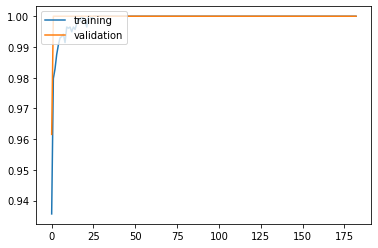

Prec: 0.9966666666666666, Recall: 0.9964028776978417, Spec: 99.64, FPR: 0.004, FPR_h: 0.009
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_43 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_86 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_87 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.0132 - accuracy: 0.9931


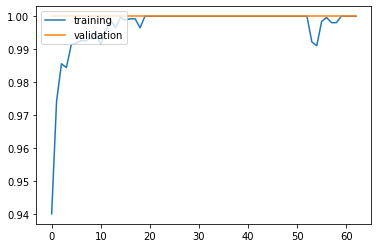

Prec: 0.9931972789115646, Recall: 0.993006993006993, Spec: 99.3, FPR: 0.007, FPR_h: 0.017
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_44 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_88 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_89 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.0110 - accuracy: 0.9965


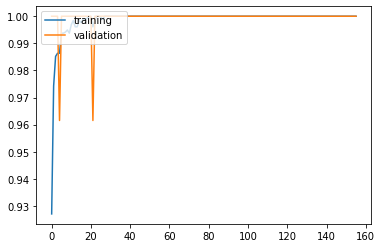

Prec: 0.9962406015037594, Recall: 0.9967948717948718, Spec: 99.68, FPR: 0.003, FPR_h: 0.008
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_45 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_90 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_91 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 3.0363e-04 - accuracy: 1.0000


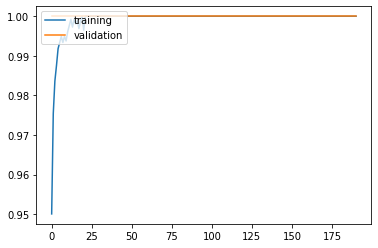

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_46 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_92 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_93 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.0705 - accuracy: 0.9861


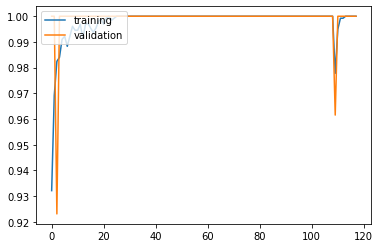

Prec: 0.9864165901290666, Recall: 0.9858529283955386, Spec: 98.59, FPR: 0.014, FPR_h: 0.035
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_47 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_94 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_95 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.1756 - accuracy: 0.9861


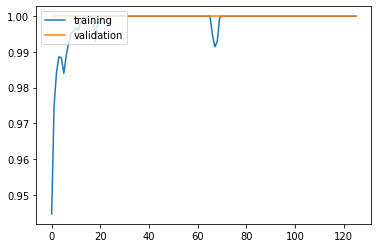

Prec: 0.9866290659794816, Recall: 0.9854959980596653, Spec: 98.55, FPR: 0.015, FPR_h: 0.036
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_48 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_96 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_97 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.0600 - accuracy: 0.9895


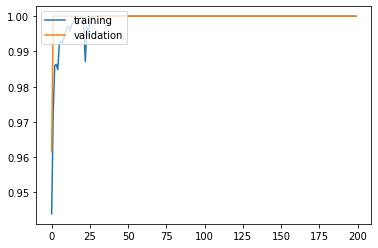

Prec: 0.99, Recall: 0.9892857142857143, Spec: 98.93, FPR: 0.011, FPR_h: 0.027
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_49 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_98 (Dense)             (None, 32)                3010592   
_________________________________________________________________
dense_99 (Dense)             (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 8ms/step - loss: 0.0570 - accuracy: 0.9930


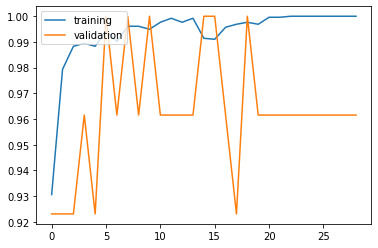

Prec: 0.9935483870967742, Recall: 0.9925373134328358, Spec: 99.25, FPR: 0.007, FPR_h: 0.019
Pt-07:
accuracy: 99.34
precision: 99.36
recall: 99.33
SPEC: 99.33
FPR: 0.007
FPR_h: 0.017

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_50 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_100 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_101 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 7ms/step - loss:

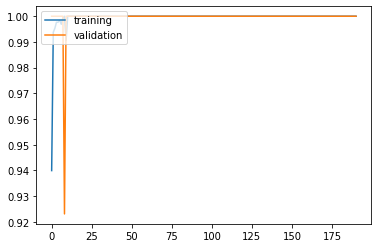

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_51 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_102 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_103 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 8ms/step - loss: 1.0594e-05 - accuracy: 1.0000


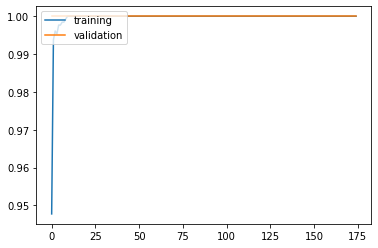

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_52 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_104 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_105 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 8ms/step - loss: 3.5841e-05 - accuracy: 1.0000


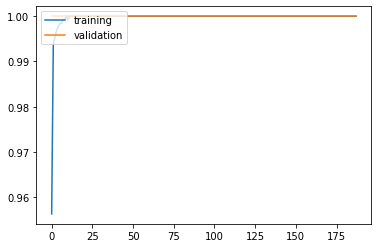

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_53 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_106 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_107 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 7ms/step - loss: 1.2227e-06 - accuracy: 1.0000


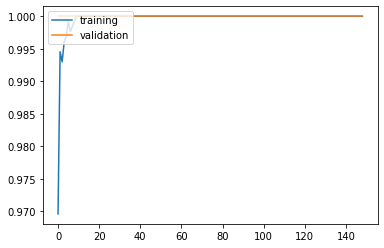

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_54 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_108 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_109 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 8ms/step - loss: 0.0085 - accuracy: 0.9931


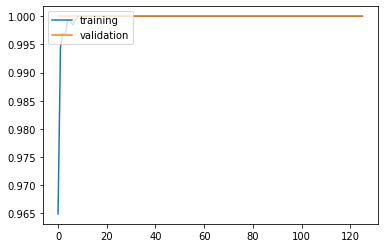

Prec: 0.9925373134328358, Recall: 0.9935897435897436, Spec: 99.36, FPR: 0.006, FPR_h: 0.032
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_55 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_110 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_111 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 7ms/step - loss: 0.0278 - accuracy: 0.9931


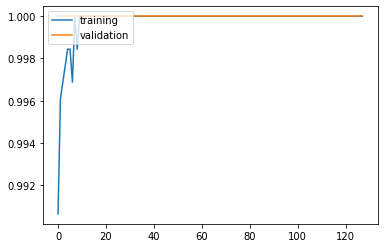

Prec: 0.9925373134328358, Recall: 0.9935897435897436, Spec: 99.36, FPR: 0.006, FPR_h: 0.032
Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_56 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_112 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_113 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 8ms/step - loss: 0.1083 - accuracy: 0.9861


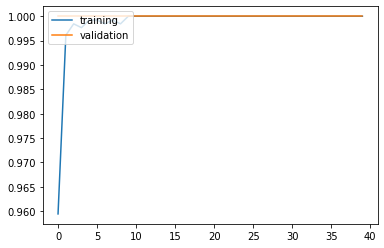

Prec: 0.9848484848484849, Recall: 0.9875, Spec: 98.75, FPR: 0.012, FPR_h: 0.062
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_57 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_114 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_115 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 8ms/step - loss: 1.1799e-05 - accuracy: 1.0000


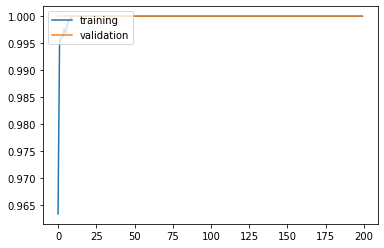

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_58 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_116 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_117 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 7ms/step - loss: 0.0720 - accuracy: 0.9931


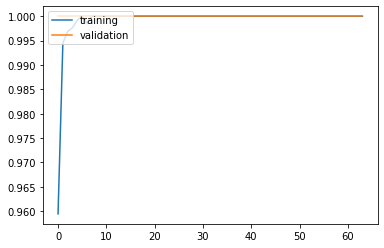

Prec: 0.9933333333333334, Recall: 0.9928571428571429, Spec: 99.29, FPR: 0.007, FPR_h: 0.036
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_59 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_118 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_119 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 7ms/step - loss: 9.4248e-06 - accuracy: 1.0000


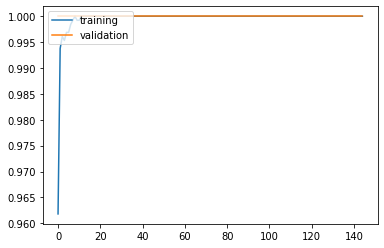

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Pt-08:
accuracy: 99.65
precision: 99.63
recall: 99.68
SPEC: 99.68
FPR: 0.003
FPR_h: 0.016

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_60 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_120 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_121 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
14/14 [==============================] - 0s 8ms/step - loss: 0.1625 - accuracy: 0.9630


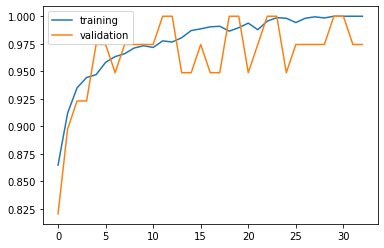

Prec: 0.9644271340473871, Recall: 0.9617097252995461, Spec: 96.17, FPR: 0.038, FPR_h: 0.064
Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_61 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_122 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_123 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
14/14 [==============================] - 0s 8ms/step - loss: 0.0979 - accuracy: 0.9722


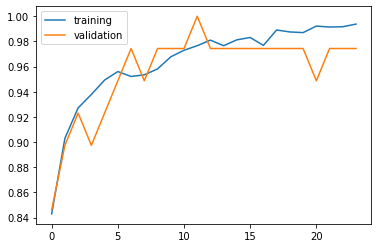

Prec: 0.9720720720720721, Recall: 0.9723557692307692, Spec: 97.24, FPR: 0.028, FPR_h: 0.046
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_62 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_124 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_125 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
14/14 [==============================] - 0s 7ms/step - loss: 0.1203 - accuracy: 0.9537


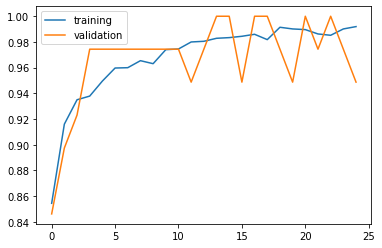

Prec: 0.9543269230769231, Recall: 0.9537037037037037, Spec: 95.37, FPR: 0.046, FPR_h: 0.077
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_63 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_126 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_127 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
14/14 [==============================] - 0s 8ms/step - loss: 0.1528 - accuracy: 0.9653


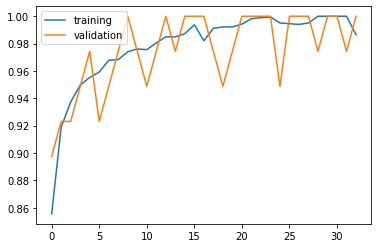

Prec: 0.9646694259183806, Recall: 0.9669827586206896, Spec: 96.7, FPR: 0.033, FPR_h: 0.055
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_64 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_128 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_129 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
14/14 [==============================] - 0s 8ms/step - loss: 0.1052 - accuracy: 0.9583


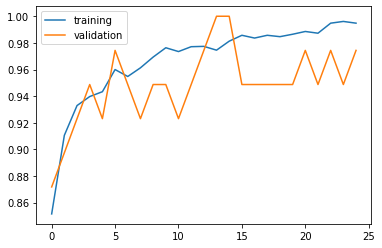

Prec: 0.9582332761578045, Recall: 0.9584298584298585, Spec: 95.84, FPR: 0.042, FPR_h: 0.069
Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_65 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_130 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_131 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
14/14 [==============================] - 0s 8ms/step - loss: 0.0880 - accuracy: 0.9769


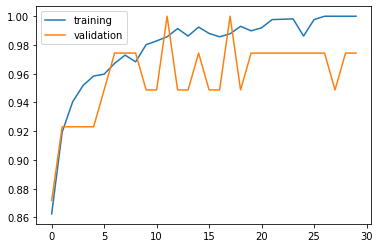

Prec: 0.9769296740994855, Recall: 0.9768069964846094, Spec: 97.68, FPR: 0.023, FPR_h: 0.039
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_66 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_132 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_133 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
14/14 [==============================] - 0s 8ms/step - loss: 0.1933 - accuracy: 0.9630


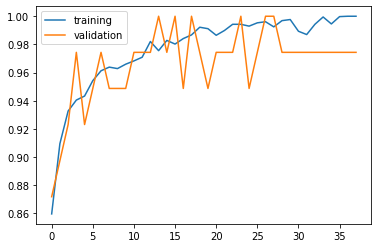

Prec: 0.9621575158482862, Recall: 0.963832035715056, Spec: 96.38, FPR: 0.036, FPR_h: 0.06
Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_67 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_134 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_135 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
14/14 [==============================] - 0s 7ms/step - loss: 0.0534 - accuracy: 0.9838


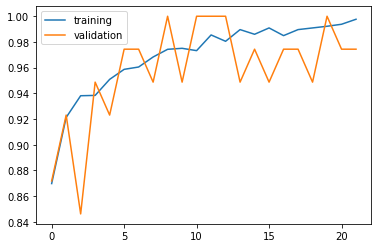

Prec: 0.9841432390479476, Recall: 0.9836219149760952, Spec: 98.36, FPR: 0.016, FPR_h: 0.027
Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_68 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_136 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_137 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
14/14 [==============================] - 0s 8ms/step - loss: 0.0756 - accuracy: 0.9814


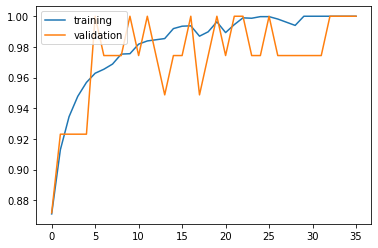

Prec: 0.9814898565706164, Recall: 0.9814276485788114, Spec: 98.14, FPR: 0.019, FPR_h: 0.031
Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_69 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_138 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_139 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
14/14 [==============================] - 0s 8ms/step - loss: 0.0991 - accuracy: 0.9675


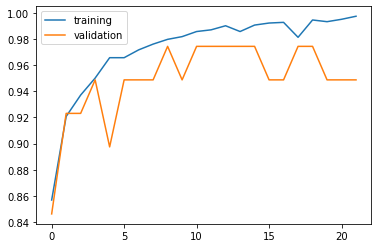

Prec: 0.9681247844084166, Recall: 0.9675602928509905, Spec: 96.76, FPR: 0.032, FPR_h: 0.054
Pt-09:
accuracy: 96.85
precision: 96.86
recall: 96.86
SPEC: 96.86
FPR: 0.031
FPR_h: 0.052

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_70 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_140 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_141 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 7ms/step - loss:

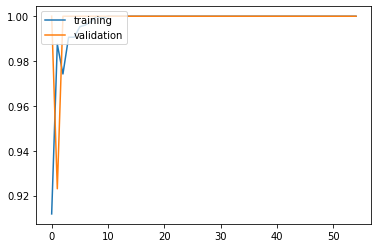

Prec: 0.9859375, Recall: 0.9859375, Spec: 98.59, FPR: 0.014, FPR_h: 0.07
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_71 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_142 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_143 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 0.9931


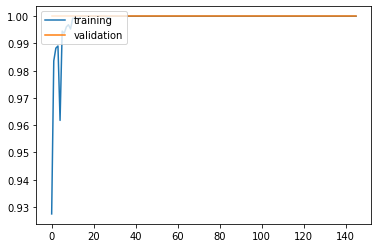

Prec: 0.9926470588235294, Recall: 0.9935064935064934, Spec: 99.35, FPR: 0.006, FPR_h: 0.032
Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_72 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_144 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_145 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 8ms/step - loss: 8.0802e-05 - accuracy: 1.0000


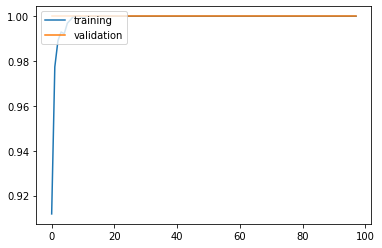

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_73 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_146 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_147 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 1.5414e-04 - accuracy: 1.0000


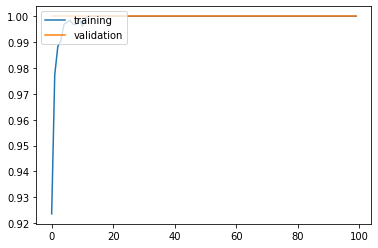

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_74 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_148 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_149 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 10ms/step - loss: 0.0141 - accuracy: 0.9931


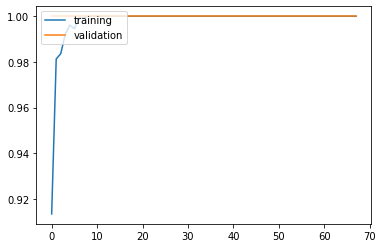

Prec: 0.9931506849315068, Recall: 0.9930555555555556, Spec: 99.31, FPR: 0.007, FPR_h: 0.035
Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_75 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_150 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_151 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 10ms/step - loss: 0.0645 - accuracy: 0.9861


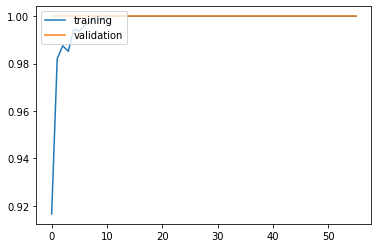

Prec: 0.9861003861003861, Recall: 0.9861003861003861, Spec: 98.61, FPR: 0.014, FPR_h: 0.069
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_76 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_152 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_153 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0163 - accuracy: 0.9931


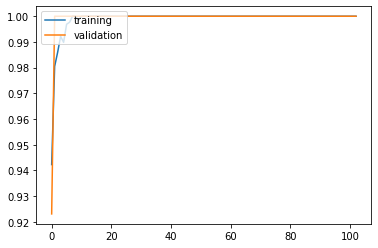

Prec: 0.9931506849315068, Recall: 0.9930555555555556, Spec: 99.31, FPR: 0.007, FPR_h: 0.035
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_77 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_154 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_155 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 10ms/step - loss: 0.0116 - accuracy: 0.9931


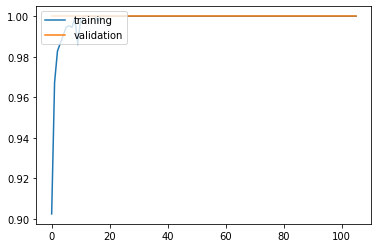

Prec: 0.9924242424242424, Recall: 0.9936708860759493, Spec: 99.37, FPR: 0.006, FPR_h: 0.032
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_78 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_156 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_157 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.9931


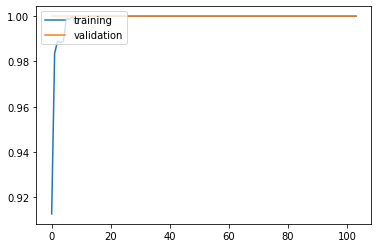

Prec: 0.9930555555555556, Recall: 0.9931506849315068, Spec: 99.32, FPR: 0.007, FPR_h: 0.034
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_79 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_158 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_159 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 12ms/step - loss: 0.0024 - accuracy: 1.0000


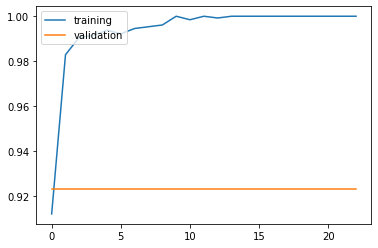

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Pt-10:
accuracy: 99.38
precision: 99.36
recall: 99.39
SPEC: 99.39
FPR: 0.006
FPR_h: 0.031

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_80 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_160 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_161 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 10ms/step - loss: 0.7218 - accuracy: 0.7604


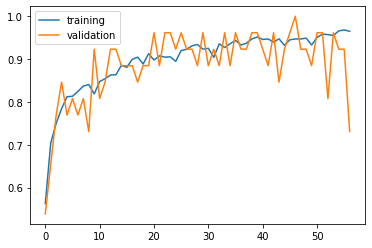

Prec: 0.8302884615384616, Recall: 0.7651613837024172, Spec: 76.52, FPR: 0.235, FPR_h: 0.587
Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_81 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_162 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_163 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 12ms/step - loss: 0.2702 - accuracy: 0.8611


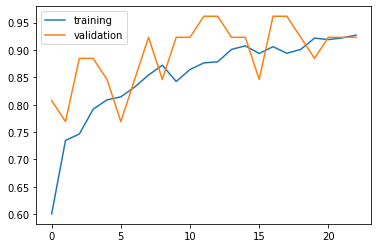

Prec: 0.86171875, Recall: 0.8589842992828067, Spec: 85.9, FPR: 0.141, FPR_h: 0.353
Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_82 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_164 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_165 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 10ms/step - loss: 0.2900 - accuracy: 0.8889


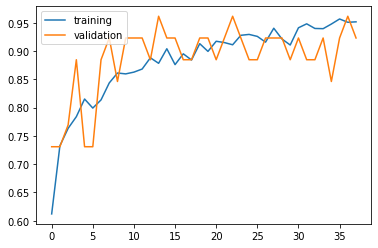

Prec: 0.8999599037690458, Recall: 0.8855072463768117, Spec: 88.55, FPR: 0.114, FPR_h: 0.286
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_83 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_166 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_167 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 10ms/step - loss: 0.6936 - accuracy: 0.4688


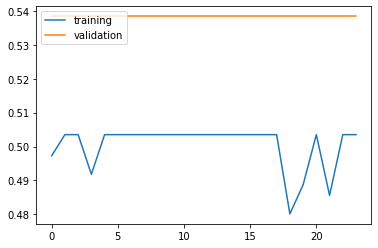

/home/npe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prec: 0.234375, Recall: 0.5, Spec: 50.0, FPR: 0.5, FPR_h: 1.25
Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_84 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_168 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_169 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 10ms/step - loss: 0.2745 - accuracy: 0.8819


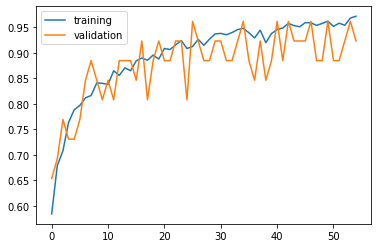

Prec: 0.8938654841093865, Recall: 0.8864020882679944, Spec: 88.64, FPR: 0.114, FPR_h: 0.284
Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_85 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_170 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_171 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 10ms/step - loss: 0.3927 - accuracy: 0.8438


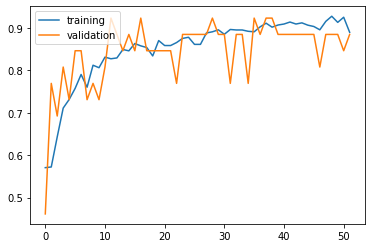

Prec: 0.8437908496732026, Recall: 0.8430434782608696, Spec: 84.3, FPR: 0.157, FPR_h: 0.392
Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_86 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_172 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_173 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 10ms/step - loss: 0.2961 - accuracy: 0.8854


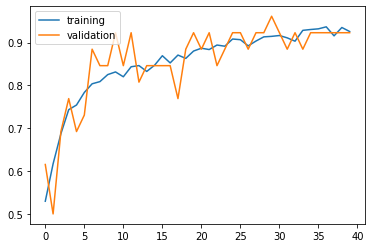

Prec: 0.8854166666666666, Recall: 0.8854352544007716, Spec: 88.54, FPR: 0.115, FPR_h: 0.286
Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_87 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_174 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_175 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 10ms/step - loss: 0.3384 - accuracy: 0.8854


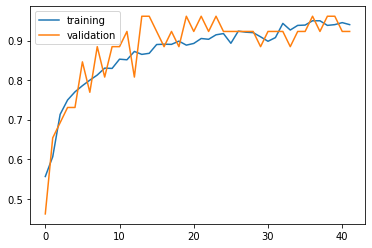

Prec: 0.8903803680981595, Recall: 0.8838803088803089, Spec: 88.39, FPR: 0.116, FPR_h: 0.29
Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_88 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_176 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_177 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 9ms/step - loss: 0.4220 - accuracy: 0.8571


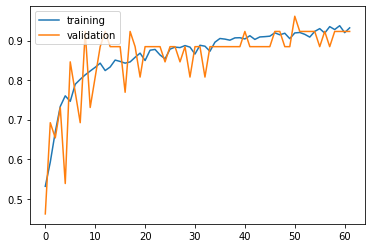

Prec: 0.8702095808383233, Recall: 0.8608112051356872, Spec: 86.08, FPR: 0.139, FPR_h: 0.349
Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_89 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_178 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_179 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 9ms/step - loss: 0.2723 - accuracy: 0.8920


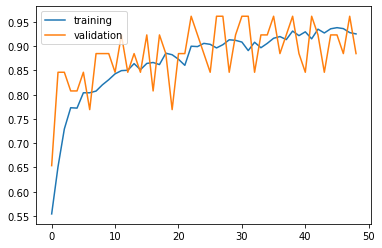

Prec: 0.8929684456564082, Recall: 0.8918997668997668, Spec: 89.19, FPR: 0.108, FPR_h: 0.271
Pt-15:
accuracy: 82.25
precision: 81.03
recall: 82.61
SPEC: 82.61
FPR: 0.174
FPR_h: 0.435

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_90 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_180 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_181 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 8ms/step - loss:

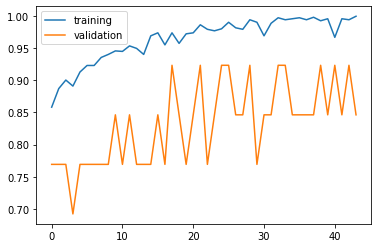

Prec: 0.9236111111111112, Recall: 0.9243478260869564, Spec: 92.43, FPR: 0.076, FPR_h: 0.378
Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_91 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_182 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_183 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 8ms/step - loss: 0.1896 - accuracy: 0.9167


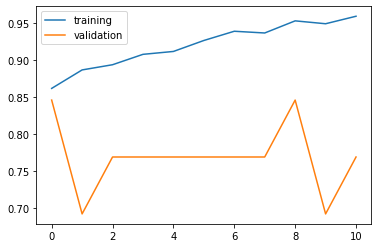

Prec: 0.9172294038201814, Recall: 0.919170381856949, Spec: 91.92, FPR: 0.081, FPR_h: 0.404
Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_92 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_184 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_185 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.2960 - accuracy: 0.8403


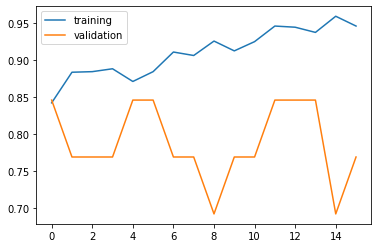

Prec: 0.8558221872541306, Recall: 0.8544973544973544, Spec: 85.45, FPR: 0.146, FPR_h: 0.728
Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_93 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_186 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_187 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.1457 - accuracy: 0.9375


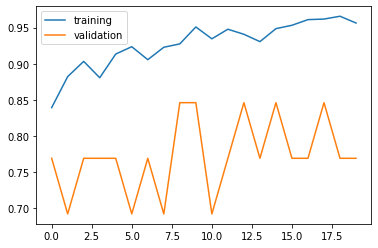

Prec: 0.9392210857592447, Recall: 0.934858812074002, Spec: 93.49, FPR: 0.065, FPR_h: 0.326
Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_94 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_188 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_189 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.2650 - accuracy: 0.8750


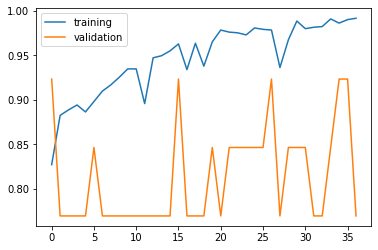

Prec: 0.8953488372093024, Recall: 0.881578947368421, Spec: 88.16, FPR: 0.118, FPR_h: 0.592
Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_95 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_190 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_191 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 10ms/step - loss: 0.1263 - accuracy: 0.9583


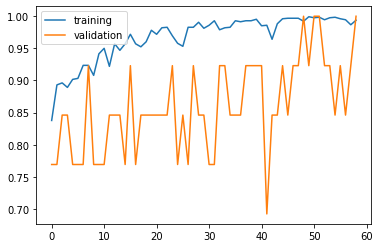

Prec: 0.9577464788732395, Recall: 0.9620253164556962, Spec: 96.2, FPR: 0.038, FPR_h: 0.19
Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_96 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_192 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_193 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0457 - accuracy: 0.9861


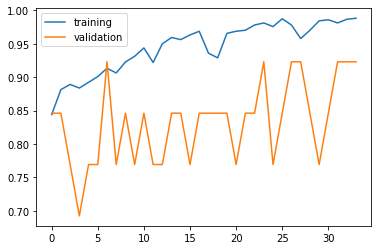

Prec: 0.984375, Recall: 0.9878048780487805, Spec: 98.78, FPR: 0.012, FPR_h: 0.061
Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_97 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_194 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_195 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.3399 - accuracy: 0.9306


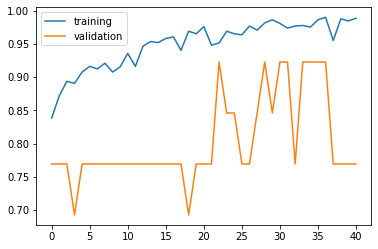

Prec: 0.93125, Recall: 0.9289044289044288, Spec: 92.89, FPR: 0.071, FPR_h: 0.355
Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_98 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_196 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_197 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.1744 - accuracy: 0.9375


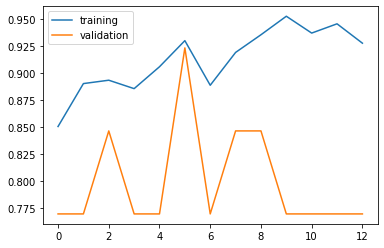

Prec: 0.937389770723104, Recall: 0.9359375, Spec: 93.59, FPR: 0.064, FPR_h: 0.32
Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_99 (Flatten)         (None, 94080)             0         
_________________________________________________________________
dense_198 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_199 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.1408 - accuracy: 0.9580


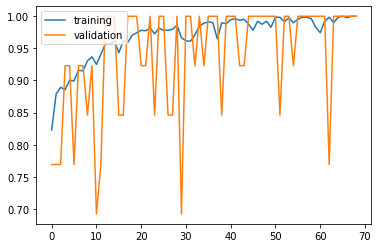

Prec: 0.9567099567099567, Recall: 0.9590585443037974, Spec: 95.91, FPR: 0.041, FPR_h: 0.206
Pt-16:
accuracy: 92.64
precision: 92.98
recall: 92.88
SPEC: 92.88
FPR: 0.071
FPR_h: 0.356

Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_100 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_200 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_201 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss

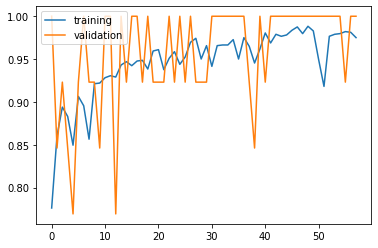

Prec: 0.9516066212268743, Recall: 0.9504662004662006, Spec: 95.05, FPR: 0.05, FPR_h: 0.248
Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_101 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_202 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_203 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.2899 - accuracy: 0.9375


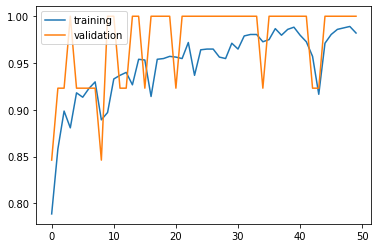

Prec: 0.9376817212638109, Recall: 0.9369195046439629, Spec: 93.69, FPR: 0.063, FPR_h: 0.315
Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_102 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_204 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_205 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.3117 - accuracy: 0.9444


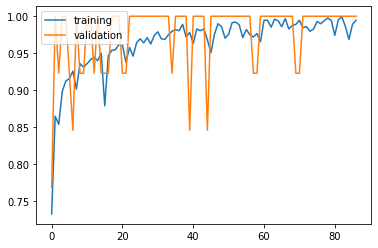

Prec: 0.9444337256415203, Recall: 0.9444337256415203, Spec: 94.44, FPR: 0.056, FPR_h: 0.278
Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_103 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_103 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_206 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_207 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0999 - accuracy: 0.9653


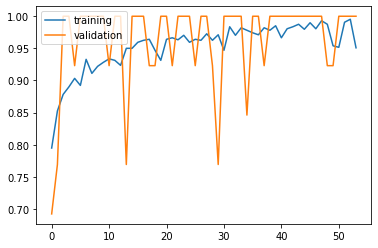

Prec: 0.9644522144522145, Recall: 0.9656280428432327, Spec: 96.56, FPR: 0.034, FPR_h: 0.172
Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_104 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_208 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_209 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0668 - accuracy: 0.9514


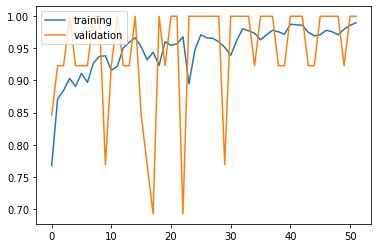

Prec: 0.9516379143244815, Recall: 0.9508513931888545, Spec: 95.09, FPR: 0.049, FPR_h: 0.246
Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_105 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_210 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_211 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0807 - accuracy: 0.9722


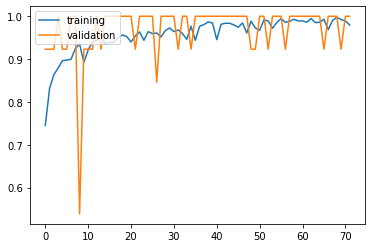

Prec: 0.9722007722007722, Recall: 0.9722007722007722, Spec: 97.22, FPR: 0.028, FPR_h: 0.139
Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_106 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_212 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_213 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0577 - accuracy: 0.9792


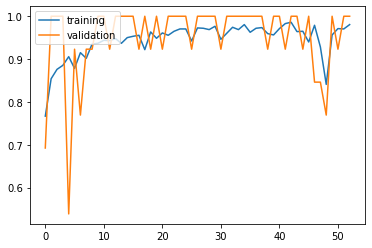

Prec: 0.9785811203721652, Recall: 0.9796037296037297, Spec: 97.96, FPR: 0.02, FPR_h: 0.102
Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_107 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_107 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_214 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_215 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.3172 - accuracy: 0.9097


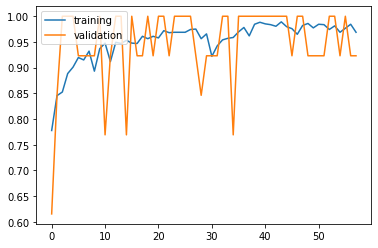

Prec: 0.9084507042253521, Recall: 0.9244186046511628, Spec: 92.44, FPR: 0.076, FPR_h: 0.378
Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_108 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_216 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_217 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.1069 - accuracy: 0.9792


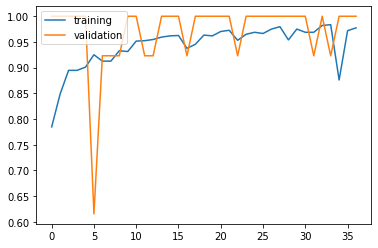

Prec: 0.9791666666666667, Recall: 0.98, Spec: 98.0, FPR: 0.02, FPR_h: 0.1
Model: "sequential_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_109 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_218 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_219 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.1646 - accuracy: 0.9371


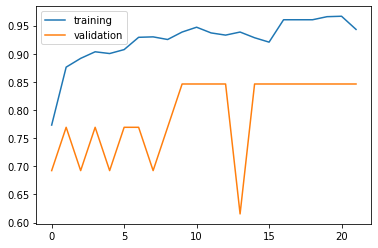

Prec: 0.9411646586345381, Recall: 0.9333333333333333, Spec: 93.33, FPR: 0.067, FPR_h: 0.336
Pt-18:
accuracy: 95.27
precision: 95.29
recall: 95.38
SPEC: 95.38
FPR: 0.046
FPR_h: 0.231

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_110 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_220 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_221 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss

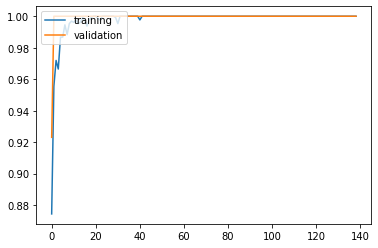

Prec: 0.9860438069393294, Recall: 0.9860438069393294, Spec: 98.6, FPR: 0.014, FPR_h: 0.07
Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_111 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_222 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_223 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0748 - accuracy: 0.9653


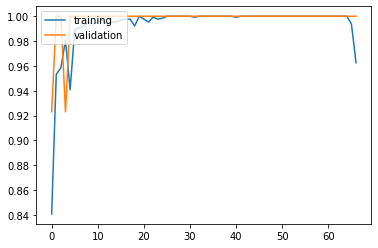

Prec: 0.9671052631578947, Recall: 0.9657534246575342, Spec: 96.58, FPR: 0.034, FPR_h: 0.171
Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_112 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_224 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_225 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0179 - accuracy: 0.9931


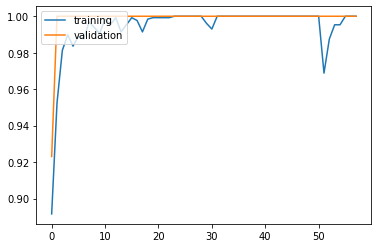

Prec: 0.9921875, Recall: 0.9938271604938271, Spec: 99.38, FPR: 0.006, FPR_h: 0.031
Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_113 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_226 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_227 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0312 - accuracy: 0.9931


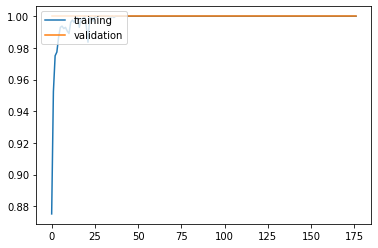

Prec: 0.9940476190476191, Recall: 0.9918032786885246, Spec: 99.18, FPR: 0.008, FPR_h: 0.041
Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_114 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_228 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_229 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0329 - accuracy: 0.9931


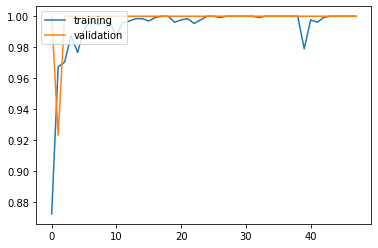

Prec: 0.9925373134328358, Recall: 0.9935897435897436, Spec: 99.36, FPR: 0.006, FPR_h: 0.032
Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_115 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_230 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_231 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 1.0000


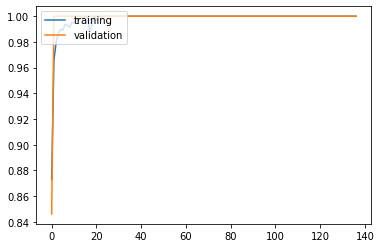

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_116 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_232 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_233 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0026 - accuracy: 1.0000


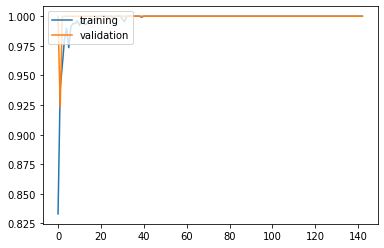

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_117 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_234 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_235 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.0028 - accuracy: 1.0000


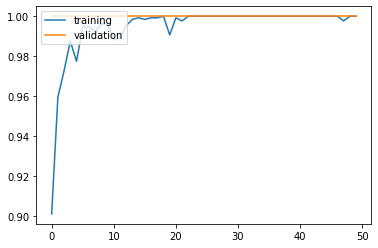

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_118 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_118 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_236 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_237 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 10ms/step - loss: 0.0227 - accuracy: 0.9931


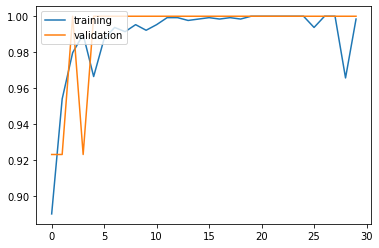

Prec: 0.9940476190476191, Recall: 0.9918032786885246, Spec: 99.18, FPR: 0.008, FPR_h: 0.041
Model: "sequential_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_119 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_119 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_238 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_239 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 10ms/step - loss: 8.7819e-04 - accuracy: 1.0000


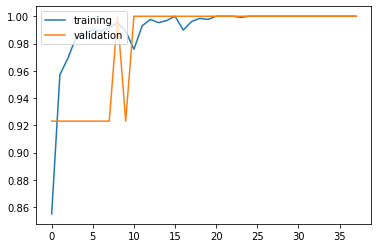

Prec: 1.0, Recall: 1.0, Spec: 100.0, FPR: 0.0, FPR_h: 0.0
Pt-21:
accuracy: 99.24
precision: 99.26
recall: 99.23
SPEC: 99.23
FPR: 0.008
FPR_h: 0.039

Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_120 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_240 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_241 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 10ms/step - loss: 0.5309 - accuracy: 0.7778


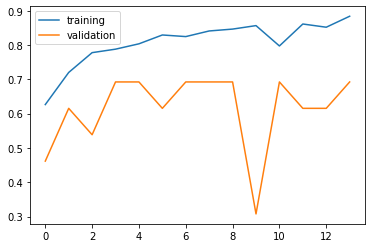

Prec: 0.8111111111111111, Recall: 0.7953125, Spec: 79.53, FPR: 0.205, FPR_h: 1.023
Model: "sequential_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_121 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_242 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_243 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.6292 - accuracy: 0.7708


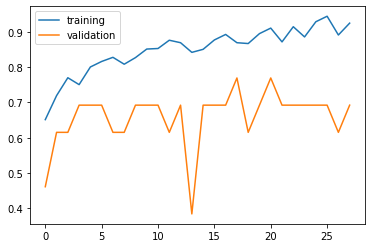

Prec: 0.791511296336916, Recall: 0.7581585081585082, Spec: 75.82, FPR: 0.242, FPR_h: 1.209
Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_122 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_122 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_244 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_245 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 10ms/step - loss: 0.3427 - accuracy: 0.8472


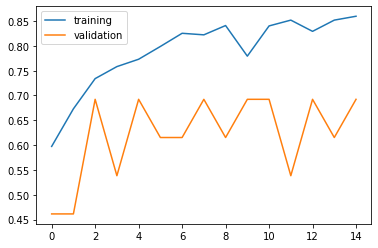

Prec: 0.848297213622291, Recall: 0.8472222222222222, Spec: 84.72, FPR: 0.153, FPR_h: 0.764
Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_123 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_246 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_247 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 8ms/step - loss: 0.4652 - accuracy: 0.8056


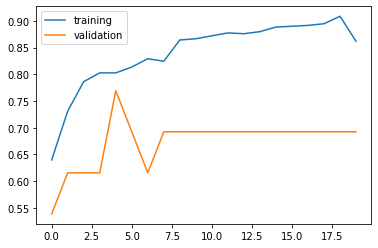

Prec: 0.8184693232131562, Recall: 0.794157740993184, Spec: 79.42, FPR: 0.206, FPR_h: 1.029
Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_124 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_124 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_248 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_249 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 10ms/step - loss: 0.3140 - accuracy: 0.8542


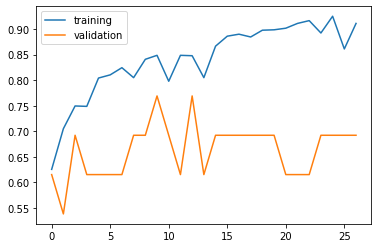

Prec: 0.8544973544973544, Recall: 0.8513986013986015, Spec: 85.14, FPR: 0.149, FPR_h: 0.743
Model: "sequential_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_125 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_250 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_251 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.5145 - accuracy: 0.8056


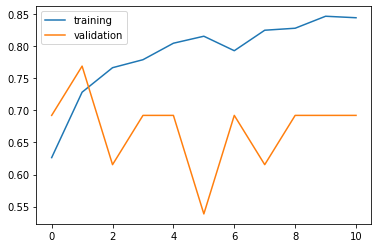

Prec: 0.8239564428312159, Recall: 0.8104347826086957, Spec: 81.04, FPR: 0.19, FPR_h: 0.948
Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_126 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_126 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_252 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_253 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.4420 - accuracy: 0.7847


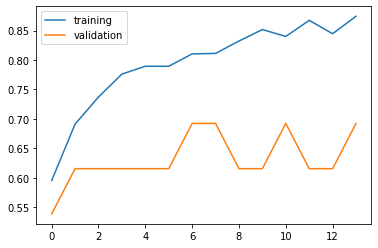

Prec: 0.7874391431353457, Recall: 0.7847222222222223, Spec: 78.47, FPR: 0.215, FPR_h: 1.076
Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_127 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_254 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_255 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 11ms/step - loss: 0.5290 - accuracy: 0.7431


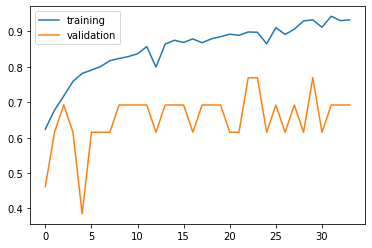

Prec: 0.748654037886341, Recall: 0.7407335907335908, Spec: 74.07, FPR: 0.259, FPR_h: 1.296
Model: "sequential_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_128 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_128 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_256 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_257 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 10ms/step - loss: 0.4780 - accuracy: 0.7569


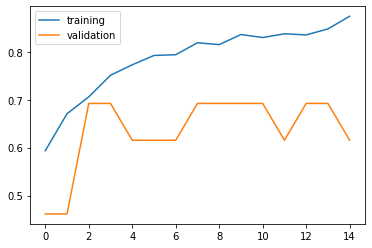

Prec: 0.7558275058275059, Recall: 0.7552820314014344, Spec: 75.53, FPR: 0.245, FPR_h: 1.224
Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 15, 98, 64)        640       
_________________________________________________________________
flatten_129 (Flatten)        (None, 94080)             0         
_________________________________________________________________
dense_258 (Dense)            (None, 32)                3010592   
_________________________________________________________________
dense_259 (Dense)            (None, 2)                 66        
Total params: 3,011,298
Trainable params: 3,011,298
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 9ms/step - loss: 0.6108 - accuracy: 0.6923


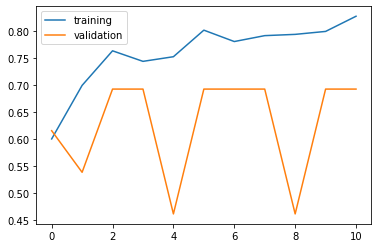

Prec: 0.7575285565939771, Recall: 0.6940532081377151, Spec: 69.41, FPR: 0.306, FPR_h: 1.54
Pt-22:
accuracy: 78.38
precision: 79.97
recall: 78.32
SPEC: 78.32
FPR: 0.217
FPR_h: 1.085



FileNotFoundError: [Errno 2] No such file or directory: 'Data/Interval-300-classes-length-60/Features/classification-1-2-3-4-5/50-clusters'

In [15]:
wb = Workbook()
ws = wb.active

ws.append(['Patient', 'Accuracy(%)', 'Precision(%)', 'Recall(%)', 'Specificity(%)', 'FPR(%)', 'FPR(/h)'])

for ctc in classes_to_classify:
    features_path = f"Data/Interval-300-classes-length-{length}/Features/classification-{'-'.join(ctc)}"
    
    for cluster in number_of_clusters[9:10]:
        all_accs, all_precs, all_sens, all_specs, all_fprs, all_fprs_h = [], [], [], [], [], []

        cluster_path = f"{features_path}/{cluster}-clusters"
        classes = os.listdir(cluster_path)
        print(f"Cluster {cluster}:")

        for pt in pts:
            x, y, x_train, x_test, y_train, y_test = [], [], [], [], [], []

            for _class in classes:
                if _class[6:] in ctc:
                    class_path = f"{cluster_path}/{_class}"
                    class_data = os.listdir(class_path)

                    for data in class_data:
                        if data[2:4] == pt:
                            try:
                                x.append(np.load(f"{class_path}/{data}"))
                                y.append(data.split('-')[1][5:])
                                
                            except:
                                print('*****')

            x, y = shuffle(x, y)             

            # Test split
            kf = KFold(n_splits=10)

            accs, precs, sens, specs, fprs, fprs_h = [], [], [], [], [], []

            for train_index, test_index in kf.split(x):
    #             print("TRAIN:", len(train_index), "TEST:", len(test_index))
                x_train, x_test, y_train, y_test = [], [], [], []

                for i in range(len(x)):
                    if i in test_index:
                        x_test.append(x[i]/1279)
                        y_test.append(y[i])

                    else:
                        x_train.append(x[i]/1279)
                        y_train.append(y[i])

                x_train, x_test = np.array(x_train), np.array(x_test)
                y_train, y_test = np.array(y_train), np.array(y_test)
                
                
                
                encoded_y_train, encoded_y_test = one_hot_encoding(y_train), one_hot_encoding(y_test)
                
                number_of_features = cluster * len(ctc)
#                 print(x_train.shape)
                x_train = x_train.reshape(len(x_train), number_of_channels, number_of_features, 1)
#                 print(x_train.shape)
                x_test = x_test.reshape(len(x_test), number_of_channels, number_of_features, 1)

                # CNN
                model = build_model((x_train.shape[1], 
                                     x_train.shape[2], 
                                     x_train.shape[3]), 
                                    len(ctc))
                
                early_stopping = EarlyStopping(patience=10)
                
                hist = model.fit(x_train, encoded_y_train, batch_size = 32, epochs = 200, verbose = 0, validation_split=0.01, callbacks=[early_stopping])
                
                # Accuracy
                loss , acc = model.evaluate(x_test, encoded_y_test, verbose=1)
                accs.append(round(acc*100, 2))
#                 print(f"ACCURACY: {acc}")
                
                plt.plot(hist.history['accuracy'])
                plt.plot(hist.history['val_accuracy'])
                plt.legend(['training', 'validation'], loc = 'upper left')
                plt.show()

                y_pred = model.predict(x_test)
                y_pred = back_to_normal_labels(y_pred, ctc)
                
                
                # Acc
#                 for i, j in zip(y_pred, y_test):
#                     print(f"y_pred: {i}, y_test: {j}")
                
                # Precision
                prec = precision_score(y_test, y_pred, average='macro')
                precs.append(round(prec*100, 2))

                # Recall (SEN)
                rec = recall_score(y_test, y_pred, average='macro')
                sens.append(round(rec*100, 2))

                # SPEC
                spec = SPEC(y_test, y_pred)
                specs.append(spec)

                # FPR(%)
                fpr = FPR(y_test, y_pred)
                fprs.append(fpr)
                
                # FPR(/h)
                fpr_h = FPR_h(y_test, y_pred)
                fprs_h.append(fpr_h)
                
                print(f"Prec: {prec}, Recall: {rec}, Spec: {spec}, FPR: {fpr}, FPR_h: {fpr_h}")

            # Calculating the averages
            pt_acc = round(np.mean(accs), 2)
            all_accs.append(pt_acc)

            pt_prec = round(np.mean(precs), 2)
            all_precs.append(pt_prec)

            pt_rec = round(np.mean(sens), 2)
            all_sens.append(pt_rec)

            pt_spec = round(np.mean(specs), 2)
            all_specs.append(pt_spec)

            pt_fpr = round(np.mean(fprs), 3)
            all_fprs.append(pt_fpr)
            
            pt_fpr_h = round(np.mean(fprs_h), 3)
            all_fprs_h.append(pt_fpr_h)


            print(f"Pt-{pt}:")
            print(f"accuracy: {pt_acc}\nprecision: {pt_prec}\nrecall: {pt_rec}\nSPEC: {pt_spec}\nFPR: {pt_fpr}\nFPR_h: {pt_fpr_h}\n")

            row = [f"Pt-{pt}", pt_acc, pt_prec, pt_rec, pt_spec, pt_fpr, pt_fpr_h]

            ws.append(row)

        ws.append(['Average', round(np.mean(all_accs), 2), round(np.mean(all_precs), 2), round(np.mean(all_sens), 2), round(np.mean(all_specs), 2), round(np.mean(all_fprs), 3), round(np.mean(all_fprs_h), 3)])
        ws.append(['*'])

    wb.save(f"Results/CNN/{length}/classes_{'_'.join(ctc)}.xlsx")

In [ ]:
classes_to_classify = [['1', '10'], 
                       ['1', '5', '10'], 
                       ['1', '3', '5', '7', '10'], 
                       ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]

In [10]:
if 'class-1'[5:] in classes_to_classify[0]:
    print('yes')

In [12]:
'class-1'[6:]

'1'

In [10]:
labels = ['1', '3', '5', '3', '3', '1']
one_hot_encoding(np.array(labels)).shape

(6, 3)

In [8]:
d = np.load('/home/npe/seizure-prediction/Data/Interval-300-classes-length-60/Features/classification-all/2-clusters/class-1/pt01-class1-0-60min.npy')

In [9]:
d.shape

(17, 10)

In [10]:
d

array([[1279,    0, 1279,    0, 1279,    0, 1279,    0, 1279,    0],
       [1279,    0, 1279,    0, 1267,   12, 1279,    0, 1279,    0],
       [1279,    0, 1279,    0,   37, 1242, 1279,    0, 1279,    0],
       [1279,    0, 1279,    0,   22, 1257, 1279,    0, 1279,    0],
       [1279,    0, 1279,    0, 1275,    4, 1279,    0, 1279,    0],
       [1279,    0, 1279,    0, 1198,   81,   10, 1269,    0, 1279],
       [1208,   71,  104, 1175,  159, 1120, 1222,   57, 1269,   10],
       [1279,    0, 1279,    0, 1218,   61, 1269,   10, 1277,    2],
       [   0, 1279, 1279,    0, 1274,    5, 1272,    7,   17, 1262],
       [1195,   84, 1212,   67, 1165,  114, 1181,   98, 1175,  104],
       [1279,    0, 1279,    0, 1278,    1, 1279,    0, 1279,    0],
       [1279,    0, 1279,    0,  804,  475, 1279,    0,    0, 1279],
       [   0, 1279, 1279,    0, 1279,    0, 1279,    0, 1279,    0],
       [   0, 1279, 1279,    0, 1225,   54, 1275,    4, 1279,    0],
       [1279,    0, 1273,    6,  4

In [16]:
x = np.random.randint(0,2557,94556)
y = np.eye((2557))[np.random.randint(0,2557,94556)]
xr = x.reshape((-1,1))


print("x.shape: {}\nxr.shape:{}\ny.shape: {}".format(x.shape, xr.shape, y.shape))

x.shape: (94556,)
xr.shape:(94556, 1)
y.shape: (94556, 2557)
